In [2]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

In [4]:
xbox_achievements = pd.read_csv(r'C:\Users\rober\OneDrive\Desktop\base-dados-data-sciece\dados\xbox\achievements.csv')
xbox_games = pd.read_csv(r'C:\Users\rober\OneDrive\Desktop\base-dados-data-sciece\dados\xbox\games.csv')
xbox_players = pd.read_csv(r'C:\Users\rober\OneDrive\Desktop\base-dados-data-sciece\dados\xbox\players.csv')
xbox_prices = pd.read_csv(r'C:\Users\rober\OneDrive\Desktop\base-dados-data-sciece\dados\xbox\prices.csv')
xbox_purchased_games = pd.read_csv(r'C:\Users\rober\OneDrive\Desktop\base-dados-data-sciece\dados\xbox\purchased_games.csv')
xbox_history = pd.read_csv(r'C:\Users\rober\OneDrive\Desktop\base-dados-data-sciece\dados\xbox\history.csv')

In [5]:
playstation_achievements = pd.read_csv(r'C:\Users\rober\OneDrive\Desktop\base-dados-data-sciece\dados\playstation\achievements.csv')
playstation_games = pd.read_csv(r'C:\Users\rober\OneDrive\Desktop\base-dados-data-sciece\dados\playstation\games.csv')
playstation_players = pd.read_csv(r'C:\Users\rober\OneDrive\Desktop\base-dados-data-sciece\dados\playstation\players.csv')
playstation_prices = pd.read_csv(r'C:\Users\rober\OneDrive\Desktop\base-dados-data-sciece\dados\playstation\prices.csv')
playstation_purchased_games = pd.read_csv(r'C:\Users\rober\OneDrive\Desktop\base-dados-data-sciece\dados\playstation\purchased_games.csv')
playstation_history = pd.read_csv(r'C:\Users\rober\OneDrive\Desktop\base-dados-data-sciece\dados\playstation\history.csv')

In [6]:
steam_achievements = pd.read_csv(r'C:\Users\rober\OneDrive\Desktop\base-dados-data-sciece\dados\steam\achievements.csv')
steam_games = pd.read_csv(r'C:\Users\rober\OneDrive\Desktop\base-dados-data-sciece\dados\steam\games.csv')
steam_players = pd.read_csv(r'C:\Users\rober\OneDrive\Desktop\base-dados-data-sciece\dados\steam\players.csv')
steam_prices = pd.read_csv(r'C:\Users\rober\OneDrive\Desktop\base-dados-data-sciece\dados\steam\prices.csv')
steam_purchased_games = pd.read_csv(r'C:\Users\rober\OneDrive\Desktop\base-dados-data-sciece\dados\steam\purchased_games.csv')
steam_private_steamids = pd.read_csv(r'C:\Users\rober\OneDrive\Desktop\base-dados-data-sciece\dados\steam\private_steamids.csv')
steam_reviews = pd.read_csv(r'C:\Users\rober\OneDrive\Desktop\base-dados-data-sciece\dados\steam\reviews.csv')
steam_friends = pd.read_csv(r'C:\Users\rober\OneDrive\Desktop\base-dados-data-sciece\dados\steam\friends.csv')
steam_history = pd.read_csv(r'C:\Users\rober\OneDrive\Desktop\base-dados-data-sciece\dados\steam\history.csv')

In [7]:
import ast

xbox_purchased_games['library'] = xbox_purchased_games['library'].apply(ast.literal_eval)

xbox_purchased_games

,playerid,library
0,848738,"[14711, 2128, 10783, 9118, 7235, 9637, 717236,..."
1,848736,"[707376, 747223, 550303, 620354, 734202, 74678..."
2,1470783,"[638932, 32551, 748147, 468697, 446682, 615753..."
3,848735,"[736287, 555825, 717258, 422060, 12645, 550263..."
4,848739,"[698325, 443814, 745210, 747223, 734202, 71154..."
...,...,...
46461,698172,"[1225, 2937, 3597, 2114, 1142, 2152, 1186, 211..."
46462,606933,"[1240, 1529, 1209, 590826, 185285, 628210, 157..."
46463,776695,"[7756, 183346, 18204, 15414, 17177, 11501, 195..."
46464,3069400,"[755119, 12694, 550303, 19170, 176537, 648424,..."


In [8]:
xbox_games_purchased = xbox_purchased_games['library'].explode()
xbox_games_purchased = xbox_games_purchased.value_counts()
xbox_games_purchased = xbox_games_purchased.reset_index()
xbox_games_purchased.columns = ['gameid', 'num_players_purchased']


In [9]:
df_xbox_most_purchased_games = xbox_games_purchased.merge(
    xbox_games,
    on='gameid', 
    how='inner', 
    indicator=True
)

In [10]:
df_xbox_most_purchased_games = df_xbox_most_purchased_games.sort_values(
    by='num_players_purchased',  # Coluna pela qual ordenar
    ascending=False               # False para ordem decrescente
)
top_20_games = df_xbox_most_purchased_games.head(20)


C:\Users\rober\AppData\Local\Temp\ipykernel_22244\1649955373.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(


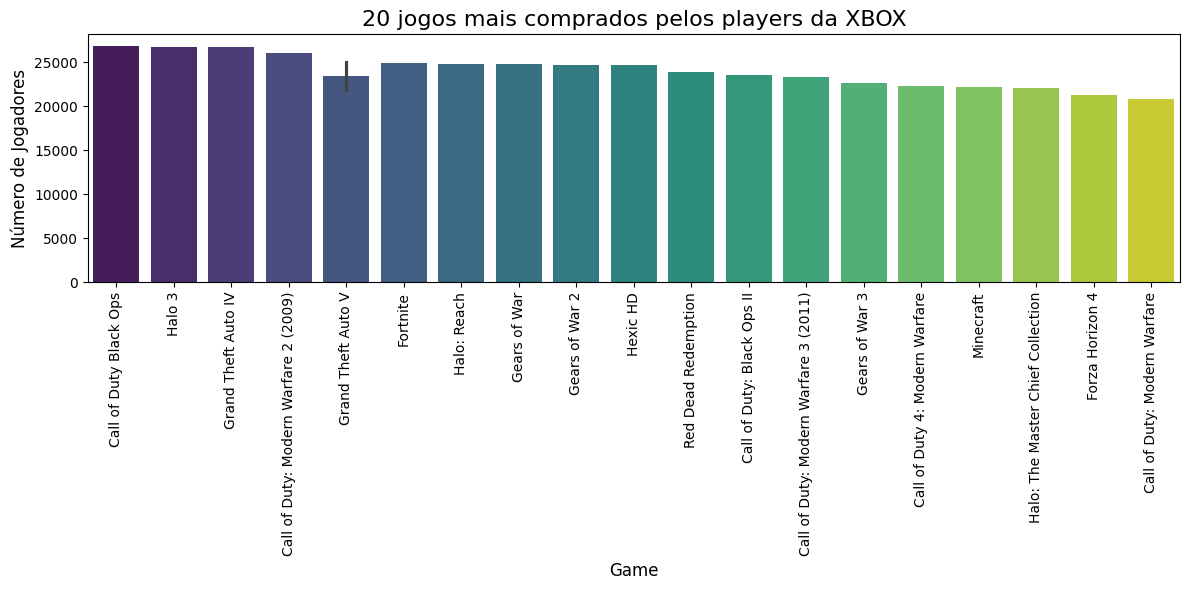

In [11]:
plt.figure(figsize=(12, 6))  # Tamanho da figura
sn.barplot(
    x='title',  # Jogos no eixo X
    y='num_players_purchased',  # Quantidade de jogadores no eixo Y
    data=top_20_games,  # Dados para o gráfico
    palette='viridis',
  # Paleta de cores (opcional)
)

plt.title('20 jogos mais comprados pelos players da XBOX', fontsize=16)
plt.xlabel('Game', fontsize=12)
plt.ylabel('Número de Jogadores', fontsize=12)

plt.xticks(rotation=90)

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [12]:
playstation_purchased_games

,playerid,library
0,268071,"[14972, 417905, 14693, 7742, 20162, 461983, 12..."
1,2218485,"[410618, 17456, 16034, 138931, 175202, 331007,..."
2,253885,"[417808, 706747, 619583, 492711, 555631, 18167..."
3,1911732,"[670209, 694794, 658551, 582894, 602666, 65531..."
4,3098524,"[19362, 170350, 12653, 20230, 12750, 18141, 41..."
...,...,...
46577,3753984,"[18141, 9459, 7779, 619584, 14339, 544742, 202..."
46578,1739644,"[141933, 333860, 8600, 20795, 7248, 167482, 44..."
46579,415935,"[550305, 417785, 420539, 417808, 550307, 14901..."
46580,210838,"[167482, 193795, 9020, 407954, 420948, 21135, ..."


In [13]:
import ast

playstation_purchased_games['library'] = playstation_purchased_games['library'].apply(ast.literal_eval)

playstation_purchased_games

,playerid,library
0,268071,"[14972, 417905, 14693, 7742, 20162, 461983, 12..."
1,2218485,"[410618, 17456, 16034, 138931, 175202, 331007,..."
2,253885,"[417808, 706747, 619583, 492711, 555631, 18167..."
3,1911732,"[670209, 694794, 658551, 582894, 602666, 65531..."
4,3098524,"[19362, 170350, 12653, 20230, 12750, 18141, 41..."
...,...,...
46577,3753984,"[18141, 9459, 7779, 619584, 14339, 544742, 202..."
46578,1739644,"[141933, 333860, 8600, 20795, 7248, 167482, 44..."
46579,415935,"[550305, 417785, 420539, 417808, 550307, 14901..."
46580,210838,"[167482, 193795, 9020, 407954, 420948, 21135, ..."


In [14]:
playstation_games_purchased = playstation_purchased_games['library'].explode()
playstation_games_purchased = playstation_games_purchased.value_counts()
playstation_games_purchased = playstation_games_purchased.reset_index()
playstation_games_purchased.columns = ['gameid', 'num_players_purchased']

In [15]:
df_playstation_most_purchased_games = playstation_games_purchased.merge(
    playstation_games,
    on='gameid', 
    how='inner', 
    indicator=True
)

In [16]:
df_clientes_conflituosos = steam_players.merge(
    xbox_players[['playerid']],
    on='playerid',
    how='inner',
    indicator=True
).merge(
    playstation_players[['playerid']],
    on='playerid',
    how='inner'
)

In [17]:
df_playstation_most_purchased_games = df_playstation_most_purchased_games.sort_values(
    by='num_players_purchased',  # Coluna pela qual ordenar
    ascending=False               # False para ordem decrescente
)
top_playstation_20_games = df_playstation_most_purchased_games.head(20)

C:\Users\rober\AppData\Local\Temp\ipykernel_22244\3979916657.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(


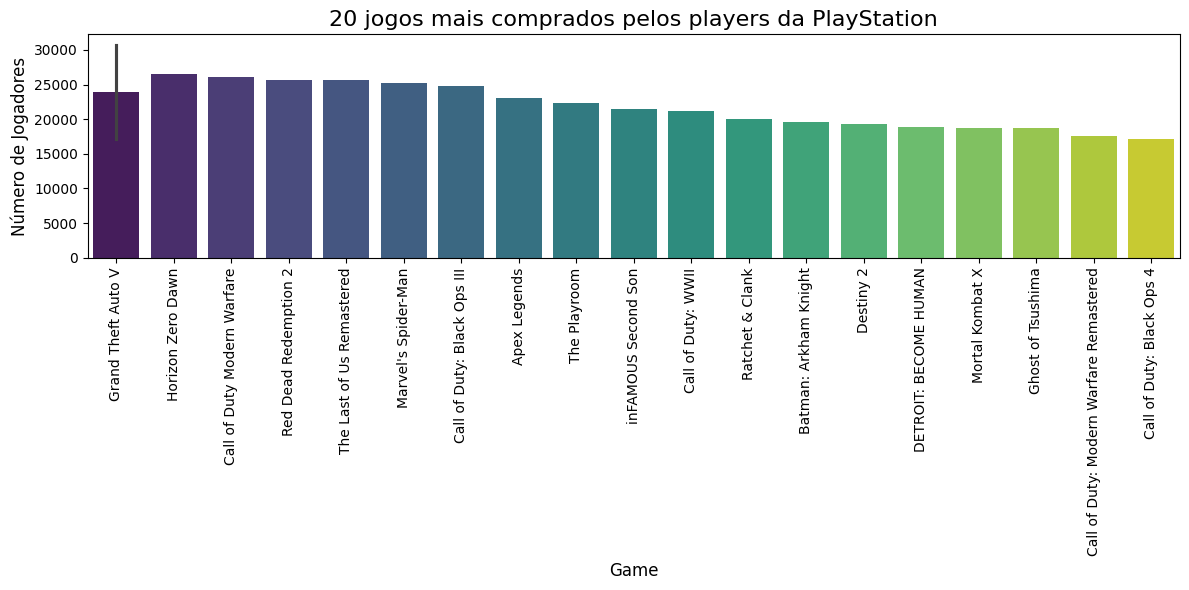

In [18]:
plt.figure(figsize=(12, 6))  # Tamanho da figura
sn.barplot(
    x='title',  # Jogos no eixo X
    y='num_players_purchased',  # Quantidade de jogadores no eixo Y
    data=top_playstation_20_games, # Dados para o gráfico
    palette='viridis'  # Paleta de cores (opcional)
)

plt.title('20 jogos mais comprados pelos players da PlayStation', fontsize=16)
plt.xlabel('Game', fontsize=12)
plt.ylabel('Número de Jogadores', fontsize=12)

plt.xticks(rotation=90)

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [42]:
steam_purchased_games

,playerid,library
0,76561198060698936,"[60, 1670, 3830, 1600, 2900, 2910, 2920, 4800,..."
1,76561198287452552,"[10, 80, 100, 240, 2990, 6880, 6910, 6920, 698..."
2,76561198040436563,"[10, 80, 100, 300, 20, 30, 40, 50, 60, 70, 130..."
3,76561198042412488,"[300, 240, 220, 320, 360, 4300, 4800, 4000, 61..."
4,76561198119605821,"[47870, 108600, 550, 271590, 331470, 381210, 2..."
...,...,...
102543,76561199063275634,NaN
102544,76561198003275888,"[3920, 2600, 6980, 4540, 4550, 7830, 22330, 22..."
102545,76561198944668572,NaN
102546,76561198033563710,NaN


In [41]:
import ast
steam_df = steam_purchased_games
steam_df = steam_df.dropna()
steam_df['library'] = steam_df['library'].apply(ast.literal_eval)

steam_df

C:\Users\rober\AppData\Local\Temp\ipykernel_22244\1515448679.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  steam_df['library'] = steam_df['library'].apply(ast.literal_eval)


,playerid,library
0,76561198060698936,"[60, 1670, 3830, 1600, 2900, 2910, 2920, 4800,..."
1,76561198287452552,"[10, 80, 100, 240, 2990, 6880, 6910, 6920, 698..."
2,76561198040436563,"[10, 80, 100, 300, 20, 30, 40, 50, 60, 70, 130..."
3,76561198042412488,"[300, 240, 220, 320, 360, 4300, 4800, 4000, 61..."
4,76561198119605821,"[47870, 108600, 550, 271590, 331470, 381210, 2..."
...,...,...
102536,76561198403590435,"[10, 80, 100, 105600, 211500, 304930, 230410, ..."
102538,76561199086010469,"[254080, 282660, 397900, 470220, 544810, 730]"
102540,76561198001591961,"[70, 851850, 238960, 208650, 220, 320, 360, 42..."
102542,76561198860044842,"[10, 80, 100, 969020, 816020, 982150, 982520, ..."


In [43]:
steam_games_purchased = steam_df['library'].explode()
steam_games_purchased = steam_games_purchased.value_counts()
steam_games_purchased = steam_games_purchased.reset_index()
steam_games_purchased.columns = ['gameid', 'num_players_purchased']

In [44]:
steam_games_purchased

,gameid,num_players_purchased
0,730,43967
1,578080,28356
2,550,24727
3,218620,23785
4,304930,21620
...,...,...
40983,1783620,1
40984,1796470,1
40985,1133330,1
40986,2658770,1


In [45]:
steam_games_purchased.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40988 entries, 0 to 40987
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   gameid                 40988 non-null  int64
 1   num_players_purchased  40988 non-null  int64
dtypes: int64(2)
memory usage: 640.6 KB


In [46]:
steam_games_purchased['gameid'] = steam_games_purchased['gameid'].astype(str)
steam_games['gameid'] = steam_games['gameid'].astype(str)
df_steam_most_purchased_games = steam_games_purchased.merge(
    steam_games,
    on='gameid', 
    how='inner', 
    indicator=True
)

In [47]:
df_steam_most_purchased_games = df_steam_most_purchased_games.sort_values(
    by='num_players_purchased',  # Coluna pela qual ordenar
    ascending=False               # False para ordem decrescente
)
top_steam_20_games = df_steam_most_purchased_games.head(20)

In [48]:
df_steam_most_purchased_games

,gameid,num_players_purchased,title,developers,publishers,genres,supported_languages,release_date,_merge
0,730,43967,Counter-Strike 2,['Valve'],['Valve'],"['Action', 'Free To Play']","['Czech', 'Danish', 'Dutch', 'English', 'Finni...",2012-08-21,both
1,578080,28356,PUBG: BATTLEGROUNDS,['PUBG Corporation'],"['KRAFTON, Inc.']","['Action', 'Adventure', 'Massively Multiplayer...","['English', 'Korean', 'Simplified Chinese', 'F...",2017-12-21,both
2,550,24727,Left 4 Dead 2,['Valve'],['Valve'],['Action'],"['Danish', 'Dutch', 'English', 'Finnish', 'Fre...",2009-11-16,both
3,218620,23785,PAYDAY 2,['OVERKILL - a Starbreeze Studio.'],['Starbreeze Publishing AB'],"['Action', 'RPG']","['English', 'German', 'French', 'Italian', 'Sp...",2013-08-13,both
4,304930,21620,Unturned,['Smartly Dressed Games'],['Smartly Dressed Games'],"['Action', 'Adventure', 'Casual', 'Indie', 'Fr...",['English'],2017-07-07,both
...,...,...,...,...,...,...,...,...,...
37063,510180,1,NDE Rescue,['6L6 Interactive'],['KSCM Consulting'],"['Action', 'Strategy']","['English', 'French', 'Italian', 'German', 'Sp...",2016-09-01,both
37062,370210,1,FIRMA,['Think Heavy Ltd.'],['Think Heavy Ltd.'],"['Action', 'Adventure', 'Indie', 'Simulation']",['English'],2016-11-18,both
37167,1783620,1,Tales of Morrow,['GameMechanic'],['GameMechanic'],['Adventure'],['English'],2024-03-08,both
37166,1625340,1,United Assault - Battle of the Bulge,"['Polygon Art', 'Enigma Entertainment']",['Polygon Art Publishing'],"['Action', 'Indie']",['English'],2022-08-18,both


C:\Users\rober\AppData\Local\Temp\ipykernel_20916\3582543017.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sn.barplot(
C:\Users\rober\AppData\Local\Temp\ipykernel_20916\3582543017.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(


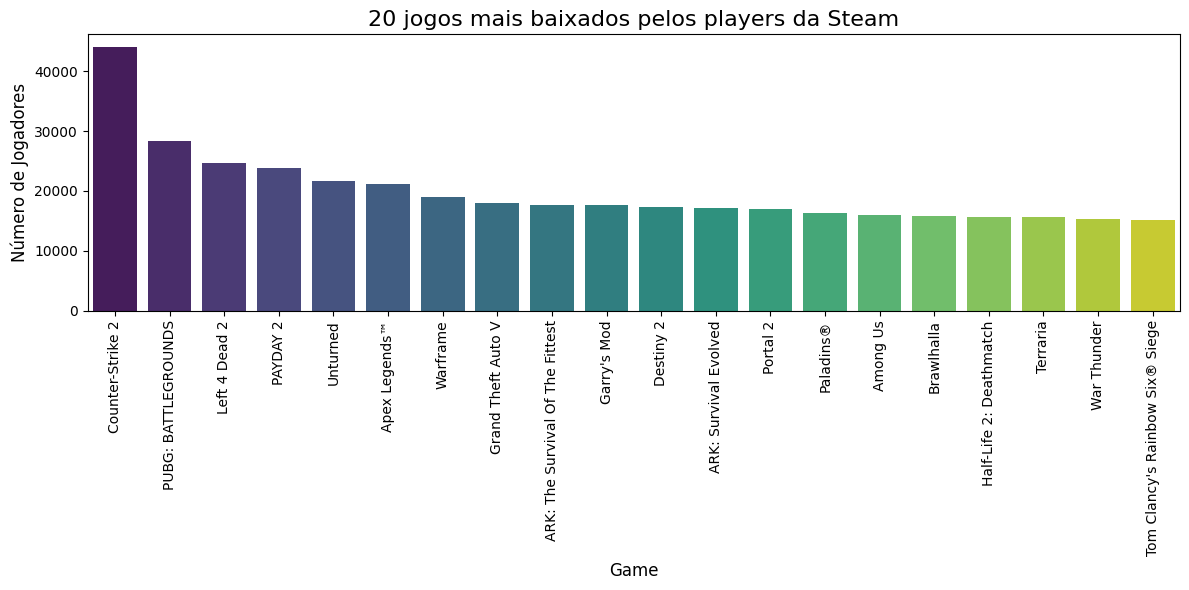

In [174]:
plt.figure(figsize=(12, 6))  # Tamanho da figura
sn.barplot(
    x='title',  # Jogos no eixo X
    y='num_players_purchased',  # Quantidade de jogadores no eixo Y
    data=top_steam_20_games,  # Dados para o gráfico
    palette='viridis',  # Paleta de cores (opcional)
    ci=None
)

plt.title('20 jogos mais baixados pelos players da Steam', fontsize=16)
plt.xlabel('Game', fontsize=12)
plt.ylabel('Número de Jogadores', fontsize=12)

plt.xticks(rotation=90)

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [175]:
#podemos imprimir os gêneros de jogos que são mais comprados
#podemos unir as 3 bases e descobrir os jogos mais comprados mesmo 

In [176]:
df_xbox_most_purchased_games

,gameid,num_players_purchased,title,developers,publishers,genres,supported_languages,release_date,_merge
0,1226,26852,Call of Duty Black Ops,['Treyarch'],['Activision'],['shooter'],"['Japanese', 'French', 'Spanish', 'German', 'I...",2011-05-03,both
1,1141,26806,Halo 3,['Bungie'],['Microsoft Studios'],['shooter'],"['Japanese', 'French', 'Spanish', 'German', 'I...",2007-09-25,both
2,1142,26768,Grand Theft Auto IV,['rockstar north'],['Rockstar Games'],"['Action', 'Adventure']","['Japanese', 'French', 'Spanish', 'German', 'I...",2009-10-13,both
3,1225,26077,Call of Duty: Modern Warfare 2 (2009),['Infinity Ward'],['Activision'],"['Action', 'Adventure', 'shooter']","['Japanese', 'French', 'Spanish', 'German', 'I...",2011-02-15,both
4,7756,24996,Grand Theft Auto V,['rockstar north'],['Rockstar Games'],"['Action', 'Adventure']","['Japanese', 'French', 'Spanish', 'German', 'I...",2022-03-15,both
...,...,...,...,...,...,...,...,...,...
10353,587795,1,RIDE 5,['Milestone'],['Milestone'],"['Simulation Racing', 'Automobile']",NaN,2023-08-23,both
10352,757039,1,Frozen Gauntlet (Windows),['Old School Vibes'],['Old School Vibes'],['Platformer'],NaN,2024-12-11,both
10319,754488,1,Smoots Summer Games II,['Kaneda Games'],['JanduSoft'],['Sports'],NaN,2024-12-12,both
10318,748367,1,Tribe: Primitive Builder,"['Baked Games', 'Space Boat Studios', 'Console...",['PlayWay'],['Survival'],NaN,2024-11-27,both


In [177]:
import ast
import pandas as pd
df_xbox_most_purchased_games['genres'] = df_xbox_most_purchased_games['genres'].str.lower()

def safe_eval(value):
    try:
        result = ast.literal_eval(value)
        if isinstance(result, list):
            return result
        else:
            return []  
    except (ValueError, SyntaxError):
        return [] 

generos_vazis_dropados = df_xbox_most_purchased_games.dropna(subset=['genres'])

generos_vazis_dropados['genres'] = generos_vazis_dropados['genres'].apply(safe_eval)

generos = generos_vazis_dropados['genres'].explode().reset_index(drop=True)
generos.unique()

C:\Users\rober\AppData\Local\Temp\ipykernel_20916\1267753939.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generos_vazis_dropados['genres'] = generos_vazis_dropados['genres'].apply(safe_eval)


array(['shooter', 'action', 'adventure', 'third person shooter',
       'battle royale', 'tower defence', 'puzzle', 'family',
       'simulation racing', 'automobile', 'open world',
       'first person shooter', 'naval', 'vehicular combat', 'mmo',
       'role-playing games (rpg)', 'strategy', 'simulation', 'video',
       'racing', 'platformer', 'flying', 'avatar', 'kinect', 'fighting',
       'social', 'game preview', 'role playing', 'dungeon crawler',
       'action-rpg', 'aerial', 'sports', 'action horror', 'hack & slash',
       'rpg', 'indie', 'stealth', 'board games', 'classics',
       'multi-player online battle arena', 'music+', 'survival',
       'action-adventure', 'management', 'roguelite', 'football',
       "beat 'em up", 'arcade racing', 'survival horror',
       'mixed martial arts', 'music & rhythm', 'metroidvania',
       'free to play', 'collection', 'point & click', 'party', 'sandbox',
       'educational & trivia', 'visual novel', 'companion', 'turn based',
     

In [ ]:
#imprimir gênero de jogos mais comprados pela XBOX


In [178]:
df_clientes_conflituosos = [steam_players, playstation_players, xbox_players]
df_clientes_conflituosos = pd.concat(df_clientes_conflituosos)
df_clientes_conflituosos['playerid'].is_unique

True

In [179]:
duplicados = steam_players[df_clientes_conflituosos['playerid'].duplicated()]
duplicados

C:\Users\rober\AppData\Local\Temp\ipykernel_20916\1240494776.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  duplicados = steam_players[df_clientes_conflituosos['playerid'].duplicated()]


,playerid,country,created


AJUSTAR POLÍTICA DE PREÇOS

In [34]:
# Visualizando o preço dos jogos por moeda
#vemos que a XBOX não tem preço de jogo nenhum em jpy
#XBOX deve fazer políticas de marketing no Japão
steam_prices

,gameid,usd,eur,gbp,jpy,rub,date_acquired,date_acquired_num
0,3281560,NaN,NaN,NaN,NaN,NaN,2024-11-28,739218
1,3280930,NaN,NaN,NaN,NaN,NaN,2024-11-28,739218
2,3280770,NaN,NaN,NaN,NaN,NaN,2024-11-28,739218
3,3279790,NaN,NaN,NaN,NaN,NaN,2024-11-28,739218
4,3278320,NaN,NaN,NaN,NaN,NaN,2024-11-28,739218
...,...,...,...,...,...,...,...,...
4414268,1499520,NaN,NaN,NaN,NaN,NaN,2025-02-24,739306
4414269,1499540,NaN,NaN,NaN,NaN,NaN,2025-02-24,739306
4414270,1499550,2.24,1.79,1.79,234.0,59.0,2025-02-24,739306
4414271,1498590,0.99,0.99,0.89,120.0,42.0,2025-02-24,739306


In [35]:
steam_prices['date_acquired'] = pd.to_datetime(steam_prices['date_acquired'], dayfirst=True)

In [36]:
df_media_precos_ao_longo_do_tempo_dolar = steam_prices.groupby(['gameid', 'date_acquired'])['usd'].mean().reset_index()

In [37]:
#ver primeiro preço e preço atual, dar um merge e criar pocentagem de jogos com a maior queda de preço
df_preco_atual = steam_prices.sort_values(by=["date_acquired"])
df_preco_atual = steam_prices.drop_duplicates('gameid', keep="last")

In [57]:
df_preco_atual['usd'] = df_preco_atual['usd'].fillna(0)
df_steam_most_purchased_games['gameid'] = df_steam_most_purchased_games['gameid'].astype(int)
df_steam_most_purchased_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37171 entries, 0 to 37165
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gameid                 37171 non-null  int64   
 1   num_players_purchased  37171 non-null  int64   
 2   title                  37170 non-null  object  
 3   developers             37074 non-null  object  
 4   publishers             36784 non-null  object  
 5   genres                 37092 non-null  object  
 6   supported_languages    37166 non-null  object  
 7   release_date           37171 non-null  object  
 8   _merge                 37171 non-null  category
dtypes: category(1), int64(2), object(6)
memory usage: 2.6+ MB


C:\Users\rober\AppData\Local\Temp\ipykernel_22244\3785236937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preco_atual['usd'] = df_preco_atual['usd'].fillna(0)


In [59]:
df_popularidade_preco = df_steam_most_purchased_games.merge(
    df_preco_atual,
    on='gameid', 
    how='inner'
)

In [60]:
df_popularidade_preco

,gameid,num_players_purchased,title,developers,publishers,genres,supported_languages,release_date,_merge,usd,eur,gbp,jpy,rub,date_acquired,date_acquired_num
0,730,43967,Counter-Strike 2,['Valve'],['Valve'],"['Action', 'Free To Play']","['Czech', 'Danish', 'Dutch', 'English', 'Finni...",2012-08-21,both,0.00,NaN,NaN,NaN,NaN,2025-02-24,739306
1,578080,28356,PUBG: BATTLEGROUNDS,['PUBG Corporation'],"['KRAFTON, Inc.']","['Action', 'Adventure', 'Massively Multiplayer...","['English', 'Korean', 'Simplified Chinese', 'F...",2017-12-21,both,0.00,NaN,NaN,NaN,NaN,2025-02-24,739306
2,550,24727,Left 4 Dead 2,['Valve'],['Valve'],['Action'],"['Danish', 'Dutch', 'English', 'Finnish', 'Fre...",2009-11-16,both,9.99,9.75,8.50,1200.0,385.0,2025-02-24,739306
3,218620,23785,PAYDAY 2,['OVERKILL - a Starbreeze Studio.'],['Starbreeze Publishing AB'],"['Action', 'RPG']","['English', 'German', 'French', 'Italian', 'Sp...",2013-08-13,both,9.99,9.99,8.50,1200.0,385.0,2025-02-24,739306
4,304930,21620,Unturned,['Smartly Dressed Games'],['Smartly Dressed Games'],"['Action', 'Adventure', 'Casual', 'Indie', 'Fr...",['English'],2017-07-07,both,0.00,NaN,NaN,NaN,NaN,2025-02-24,739306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37166,510180,1,NDE Rescue,['6L6 Interactive'],['KSCM Consulting'],"['Action', 'Strategy']","['English', 'French', 'Italian', 'German', 'Sp...",2016-09-01,both,7.99,NaN,5.59,798.0,189.0,2025-02-24,739306
37167,370210,1,FIRMA,['Think Heavy Ltd.'],['Think Heavy Ltd.'],"['Action', 'Adventure', 'Indie', 'Simulation']",['English'],2016-11-18,both,0.00,NaN,NaN,NaN,NaN,2025-02-24,739306
37168,1783620,1,Tales of Morrow,['GameMechanic'],['GameMechanic'],['Adventure'],['English'],2024-03-08,both,14.99,14.79,12.79,1700.0,550.0,2025-02-24,739306
37169,1625340,1,United Assault - Battle of the Bulge,"['Polygon Art', 'Enigma Entertainment']",['Polygon Art Publishing'],"['Action', 'Indie']",['English'],2022-08-18,both,14.99,14.79,12.79,1700.0,550.0,2025-02-24,739306


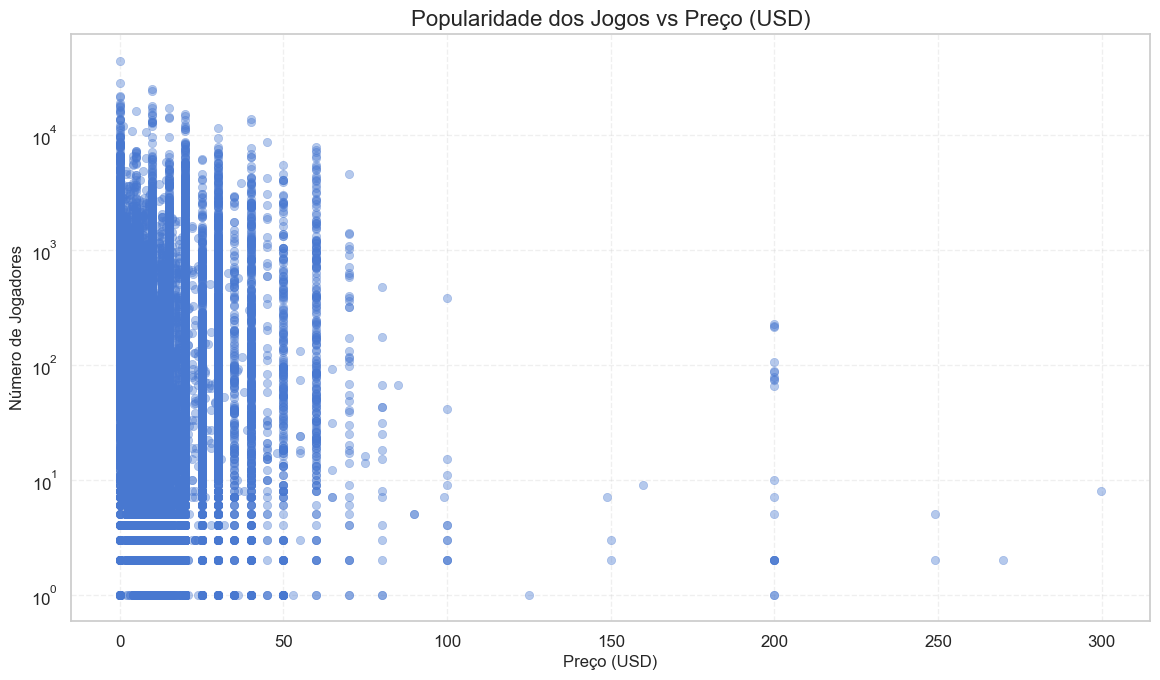

In [72]:
#verificar se os jogos mais baratos ou mais caros são mais comprados, preço e popularidade
sn.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.figure(figsize=(12, 7))

sn.scatterplot(
    data=df_popularidade_preco,
    x='usd',
    y='num_players_purchased',
    alpha=0.4,
    edgecolor=None
)
plt.title('Popularidade dos Jogos vs Preço (USD)', fontsize=16)
plt.xlabel('Preço (USD)', fontsize=12)
plt.ylabel('Número de Jogadores', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

plt.yscale('log')

plt.show()

In [ ]:
#Existe um limiar psicológico dos preços
#Passou do limiar dos jogos Triple Way, 60 dólares, os jogos são menos populares a medida que aumentam de preço.

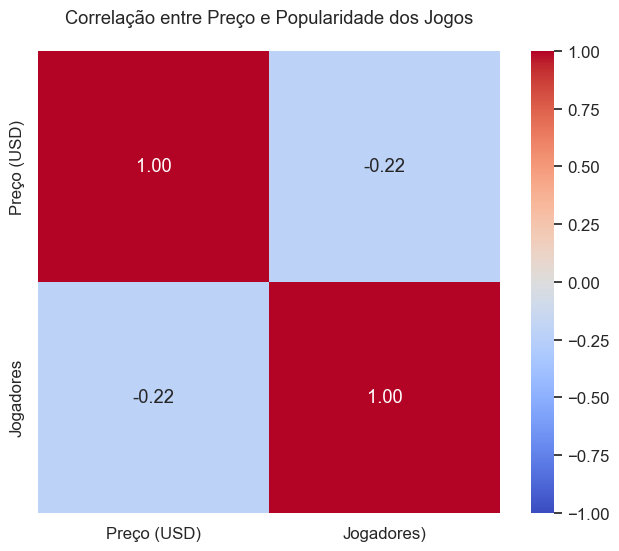

In [82]:
correlacao = df_popularidade_preco[['usd', 'num_players_purchased']].corr('spearman')

# 2. Crie o heatmap de correlação
plt.figure(figsize=(8, 6))
heatmap = sn.heatmap(
    correlacao,
    annot=True,         
    fmt=".2f",         
    cmap="coolwarm",   
    vmin=-1,            
    vmax=1,             
    square=True         
)

plt.title("Correlação entre Preço e Popularidade dos Jogos", pad=20)
heatmap.set_xticklabels(['Preço (USD)', 'Jogadores)'])
heatmap.set_yticklabels(['Preço (USD)', 'Jogadores'])

plt.show()

In [105]:
df_steam_custo_beneficio = df_popularidade_preco

df_steam_custo_beneficio['value_score'] = np.where(
    df_steam_custo_beneficio['usd'] > 0,  # Condição
    df_steam_custo_beneficio['num_players_purchased'] / df_steam_custo_beneficio['usd'],  # Se True
    df_steam_custo_beneficio['num_players_purchased'] / (df_steam_custo_beneficio['usd'] + 1)  # Se False (evita divisão por zero)
)

df_steam_custo_beneficio

,gameid,num_players_purchased,title,developers,publishers,genres,supported_languages,release_date,_merge,usd,eur,gbp,jpy,rub,date_acquired,date_acquired_num,custo_beneficio,value_score
0,730,43967,Counter-Strike 2,['Valve'],['Valve'],"['Action', 'Free To Play']","['Czech', 'Danish', 'Dutch', 'English', 'Finni...",2012-08-21,both,0.00,NaN,NaN,NaN,NaN,2025-02-24,739306,43967.000000,43967.000000
1,578080,28356,PUBG: BATTLEGROUNDS,['PUBG Corporation'],"['KRAFTON, Inc.']","['Action', 'Adventure', 'Massively Multiplayer...","['English', 'Korean', 'Simplified Chinese', 'F...",2017-12-21,both,0.00,NaN,NaN,NaN,NaN,2025-02-24,739306,28356.000000,28356.000000
2,550,24727,Left 4 Dead 2,['Valve'],['Valve'],['Action'],"['Danish', 'Dutch', 'English', 'Finnish', 'Fre...",2009-11-16,both,9.99,9.75,8.50,1200.0,385.0,2025-02-24,739306,2249.954504,2475.175175
3,218620,23785,PAYDAY 2,['OVERKILL - a Starbreeze Studio.'],['Starbreeze Publishing AB'],"['Action', 'RPG']","['English', 'German', 'French', 'Italian', 'Sp...",2013-08-13,both,9.99,9.99,8.50,1200.0,385.0,2025-02-24,739306,2164.240218,2380.880881
4,304930,21620,Unturned,['Smartly Dressed Games'],['Smartly Dressed Games'],"['Action', 'Adventure', 'Casual', 'Indie', 'Fr...",['English'],2017-07-07,both,0.00,NaN,NaN,NaN,NaN,2025-02-24,739306,21620.000000,21620.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37166,510180,1,NDE Rescue,['6L6 Interactive'],['KSCM Consulting'],"['Action', 'Strategy']","['English', 'French', 'Italian', 'German', 'Sp...",2016-09-01,both,7.99,NaN,5.59,798.0,189.0,2025-02-24,739306,0.111235,0.125156
37167,370210,1,FIRMA,['Think Heavy Ltd.'],['Think Heavy Ltd.'],"['Action', 'Adventure', 'Indie', 'Simulation']",['English'],2016-11-18,both,0.00,NaN,NaN,NaN,NaN,2025-02-24,739306,1.000000,1.000000
37168,1783620,1,Tales of Morrow,['GameMechanic'],['GameMechanic'],['Adventure'],['English'],2024-03-08,both,14.99,14.79,12.79,1700.0,550.0,2025-02-24,739306,0.062539,0.066711
37169,1625340,1,United Assault - Battle of the Bulge,"['Polygon Art', 'Enigma Entertainment']",['Polygon Art Publishing'],"['Action', 'Indie']",['English'],2022-08-18,both,14.99,14.79,12.79,1700.0,550.0,2025-02-24,739306,0.062539,0.066711


C:\Users\rober\AppData\Local\Temp\ipykernel_22244\391151126.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sn.barplot(


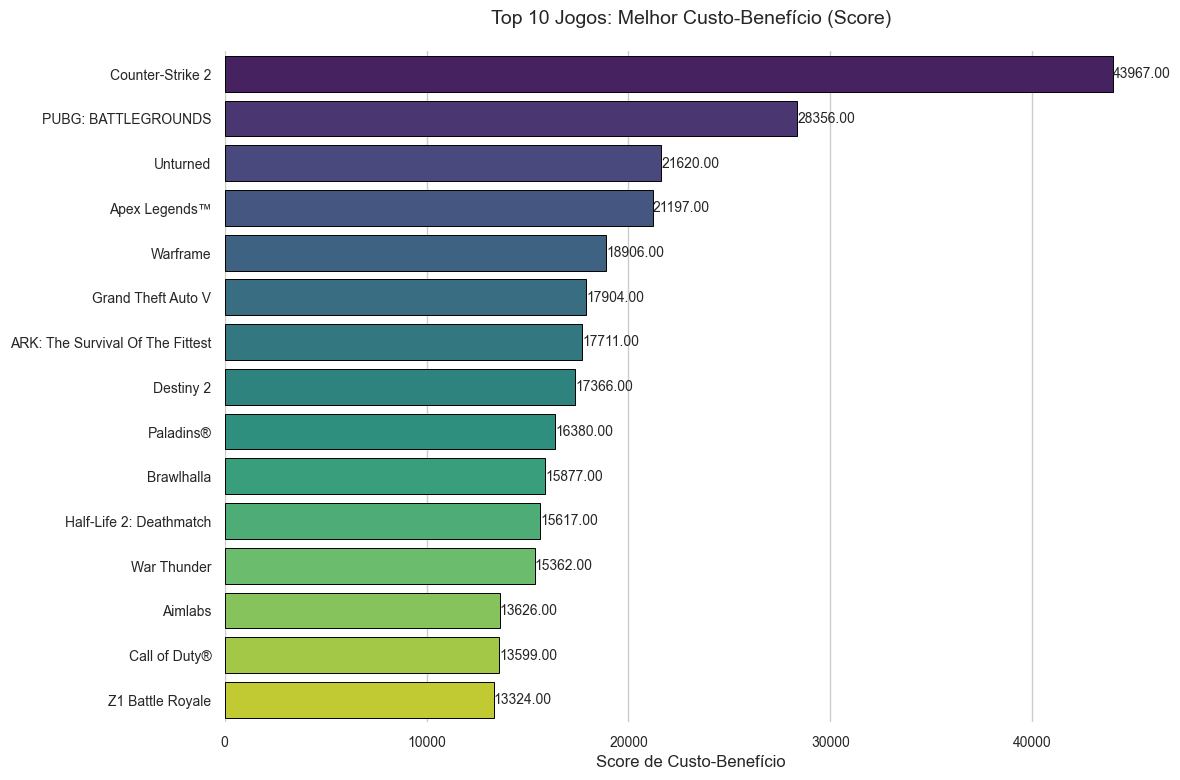

In [106]:
#QUANTOS JOGADORES O JOFO ATRAI POR DÓLAR GASTO

plt.figure(figsize=(12, 8))  # Aumenta o tamanho do gráfico
sn.set_style("whitegrid")    # Fundo com grid para melhor leitura

# Ordena e seleciona os top 10
top_value = df_steam_custo_beneficio.sort_values('value_score', ascending=False).head(15)

# Cria o gráfico de barras HORIZONTAIS para melhor legibilidade
barplot = sn.barplot(
    data=top_value,
    y='title',  # Títulos no eixo Y (barras horizontais)
    x='value_score',  
    palette="viridis",  # Mapa de cores mais atraente
    edgecolor="black",  # Bordas nas barras
    linewidth=0.7       # Espessura da borda
)

# Adiciona rótulos de valor nas barras
for i, score in enumerate(top_value['value_score']):
    plt.text(score + 0.05, i, f"{score:.2f}", va='center', fontsize=10)  # Formata com 2 casas decimais

# Ajustes estéticos
plt.title("Top 10 Jogos: Melhor Custo-Benefício (Score)", pad=20, fontsize=14)
plt.xlabel("Score de Custo-Benefício", fontsize=12)
plt.ylabel("")  # Remove o rótulo do eixo Y (os títulos já são autoexplicativos)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)  # Tamanho da fonte dos títulos dos jogos

# Remove bordas desnecessárias
sn.despine(left=True, bottom=True)

# Ajusta layout para evitar cortes
plt.tight_layout()
plt.show()

In [107]:
df_steam_custo_beneficio = df_popularidade_preco[df_popularidade_preco['usd'] > 0]
df_steam_custo_beneficio['value_score'] = df_popularidade_preco['num_players_purchased'] / (df_popularidade_preco['usd'])
df_steam_custo_beneficio

C:\Users\rober\AppData\Local\Temp\ipykernel_22244\892081942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_steam_custo_beneficio['value_score'] = df_popularidade_preco['num_players_purchased'] / (df_popularidade_preco['usd'])


,gameid,num_players_purchased,title,developers,publishers,genres,supported_languages,release_date,_merge,usd,eur,gbp,jpy,rub,date_acquired,date_acquired_num,custo_beneficio,value_score
2,550,24727,Left 4 Dead 2,['Valve'],['Valve'],['Action'],"['Danish', 'Dutch', 'English', 'Finnish', 'Fre...",2009-11-16,both,9.99,9.75,8.50,1200.0,385.0,2025-02-24,739306,2249.954504,2475.175175
3,218620,23785,PAYDAY 2,['OVERKILL - a Starbreeze Studio.'],['Starbreeze Publishing AB'],"['Action', 'RPG']","['English', 'German', 'French', 'Italian', 'Sp...",2013-08-13,both,9.99,9.99,8.50,1200.0,385.0,2025-02-24,739306,2164.240218,2380.880881
9,4000,17676,Garry's Mod,['Facepunch Studios'],['Valve'],"['Casual', 'Indie', 'Simulation']","['English', 'French', 'Italian', 'German', 'Sp...",2006-11-29,both,9.99,9.99,6.99,980.0,750.0,2025-02-24,739306,1608.371247,1769.369369
11,346110,17082,ARK: Survival Evolved,"['Studio Wildcard', 'Instinct Games', 'Efecto ...","['Studio Wildcard', 'Snail Games USA']","['Action', 'Adventure', 'Indie', 'Massively Mu...","['English', 'French', 'Italian', 'German', 'Sp...",2017-08-27,both,14.99,14.79,12.79,1700.0,550.0,2025-02-24,739306,1068.292683,1139.559706
12,620,17026,Portal 2,['Valve'],['Valve'],"['Action', 'Adventure']","['English', 'French', 'German', 'Spanish - Spa...",2011-04-18,both,9.99,9.75,8.50,1200.0,385.0,2025-02-24,739306,1549.226570,1704.304304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37165,2591010,1,Silent Depth 2: Pacific,['MicroProse Software'],['MicroProse Software'],"['Action', 'Casual', 'Simulation', 'Strategy',...",['English'],2024-07-16,both,10.39,10.23,8.79,1200.0,392.0,2025-02-24,739306,0.087796,0.096246
37166,510180,1,NDE Rescue,['6L6 Interactive'],['KSCM Consulting'],"['Action', 'Strategy']","['English', 'French', 'Italian', 'German', 'Sp...",2016-09-01,both,7.99,NaN,5.59,798.0,189.0,2025-02-24,739306,0.111235,0.125156
37168,1783620,1,Tales of Morrow,['GameMechanic'],['GameMechanic'],['Adventure'],['English'],2024-03-08,both,14.99,14.79,12.79,1700.0,550.0,2025-02-24,739306,0.062539,0.066711
37169,1625340,1,United Assault - Battle of the Bulge,"['Polygon Art', 'Enigma Entertainment']",['Polygon Art Publishing'],"['Action', 'Indie']",['English'],2022-08-18,both,14.99,14.79,12.79,1700.0,550.0,2025-02-24,739306,0.062539,0.066711


C:\Users\rober\AppData\Local\Temp\ipykernel_22244\3127634354.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sn.barplot(


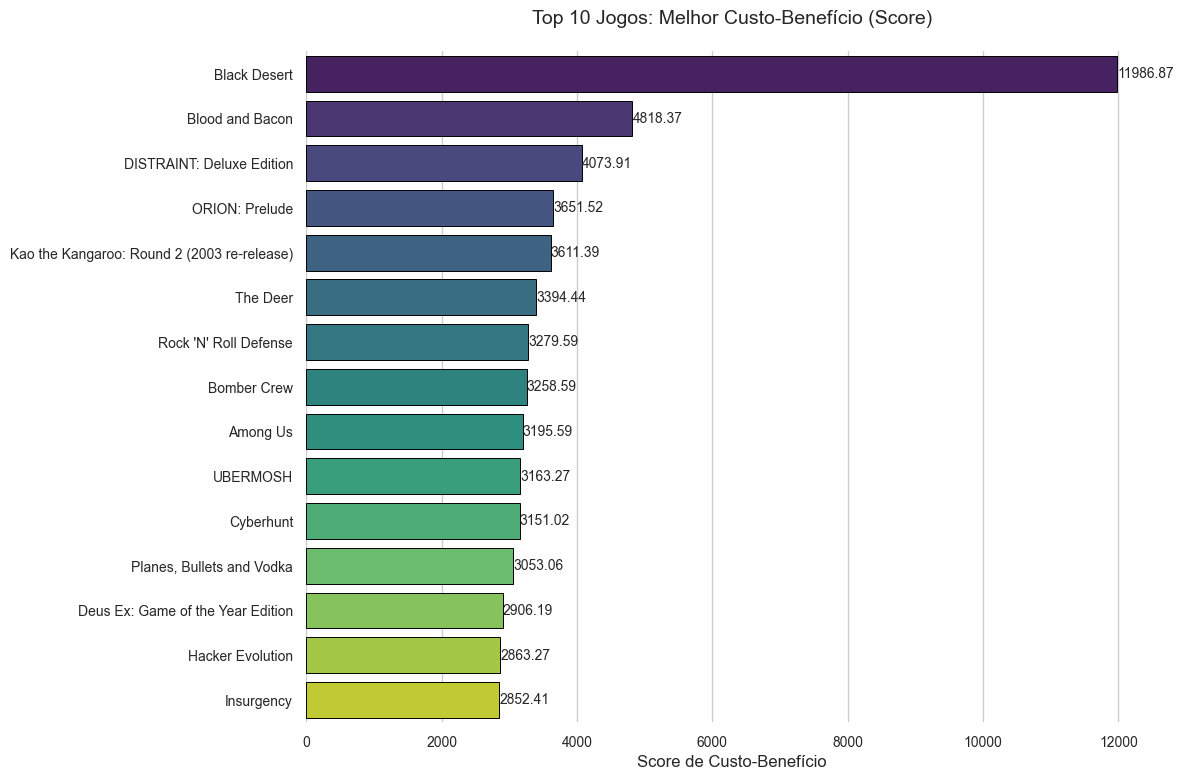

In [108]:
# Configurações iniciais
plt.figure(figsize=(12, 8))  # Aumenta o tamanho do gráfico
sn.set_style("whitegrid")    # Fundo com grid para melhor leitura

# Ordena e seleciona os top 10
top_value = df_steam_custo_beneficio.sort_values('value_score', ascending=False).head(15)

# Cria o gráfico de barras HORIZONTAIS para melhor legibilidade
barplot = sn.barplot(
    data=top_value,
    y='title',  # Títulos no eixo Y (barras horizontais)
    x='value_score',  
    palette="viridis",  # Mapa de cores mais atraente
    edgecolor="black",  # Bordas nas barras
    linewidth=0.7       # Espessura da borda
)

# Adiciona rótulos de valor nas barras
for i, score in enumerate(top_value['value_score']):
    plt.text(score + 0.05, i, f"{score:.2f}", va='center', fontsize=10)  # Formata com 2 casas decimais

# Ajustes estéticos
plt.title("Top 10 Jogos: Melhor Custo-Benefício (Score)", pad=20, fontsize=14)
plt.xlabel("Score de Custo-Benefício", fontsize=12)
plt.ylabel("")  # Remove o rótulo do eixo Y (os títulos já são autoexplicativos)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)  # Tamanho da fonte dos títulos dos jogos

# Remove bordas desnecessárias
sn.despine(left=True, bottom=True)

# Ajusta layout para evitar cortes
plt.tight_layout()
plt.show()

C:\Users\rober\AppData\Local\Temp\ipykernel_22244\2483152023.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_15 = df.sort_values('players_per_usd', ascending=False).groupby('price_range').head(3).nlargest(15, 'players_per_usd')


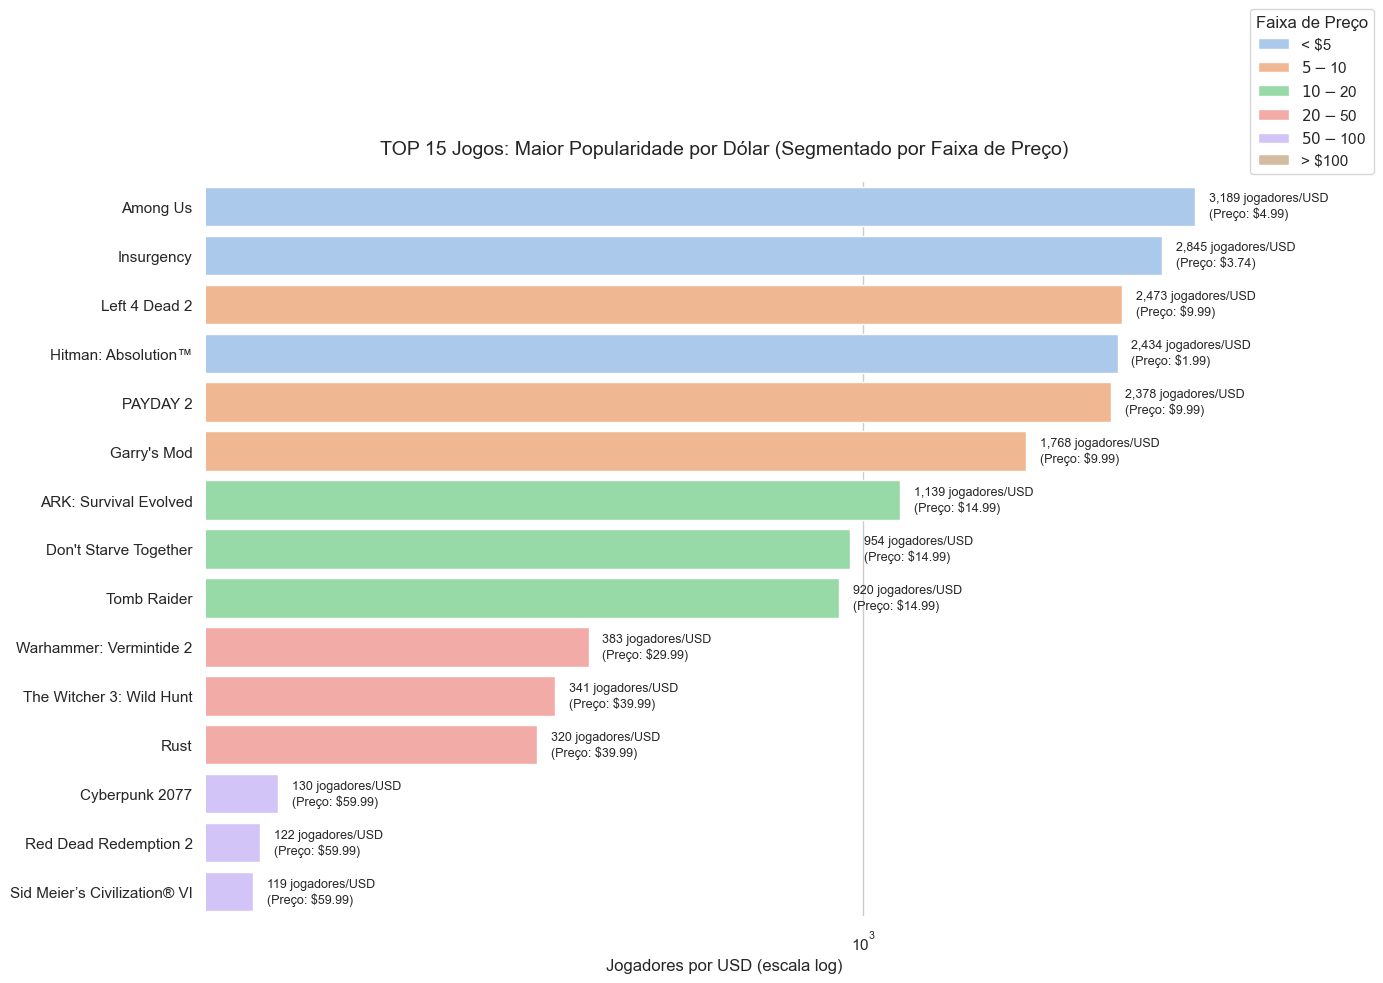

In [ ]:
df = df_popularidade_preco.copy()

df['players_per_usd'] = df['num_players_purchased'] / (df['usd'] + 0.01)  
df['price_range'] = pd.cut(df['usd'], 
                          bins=[1, 5, 10, 20, 50, 100, np.inf],
                          labels=['$1-$5', '$5-$10', '$10-$20', '$20-$50', '$50-$100', '> $100'])


top_15 = df.sort_values('players_per_usd', ascending=False).groupby('price_range').head(3).nlargest(15, 'players_per_usd')

plt.figure(figsize=(14, 10))
sn.set_theme(style="whitegrid", palette="pastel")

barplot = sn.barplot(
    data=top_15,
    y='title',
    x='players_per_usd',
    hue='price_range',
    dodge=False,
    estimator=np.median,
    errorbar=None
)

plt.title('TOP 15 Jogos: Maior Popularidade por Dólar (Segmentado por Faixa de Preço)', pad=20, fontsize=14)
plt.xlabel('Jogadores por USD (escala log)', fontsize=12)
plt.ylabel('', fontsize=12)
plt.xscale('log') 

# Adicionar valores nas barras
for i, (_, row) in enumerate(top_15.iterrows()):
    plt.text(row['players_per_usd'] * 1.05, i, 
             f"{row['players_per_usd']:,.0f} jogadores/USD\n(Preço: ${row['usd']:.2f})", 
             va='center', fontsize=9)

# Ajustes finais
plt.legend(title='Faixa de Preço', bbox_to_anchor=(1, 1))
sn.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

In [87]:
steam_prices

,gameid,usd,eur,gbp,jpy,rub,date_acquired,date_acquired_num
0,3281560,NaN,NaN,NaN,NaN,NaN,2024-11-28,739218
1,3280930,NaN,NaN,NaN,NaN,NaN,2024-11-28,739218
2,3280770,NaN,NaN,NaN,NaN,NaN,2024-11-28,739218
3,3279790,NaN,NaN,NaN,NaN,NaN,2024-11-28,739218
4,3278320,NaN,NaN,NaN,NaN,NaN,2024-11-28,739218
...,...,...,...,...,...,...,...,...
4414268,1499520,NaN,NaN,NaN,NaN,NaN,2025-02-24,739306
4414269,1499540,NaN,NaN,NaN,NaN,NaN,2025-02-24,739306
4414270,1499550,2.24,1.79,1.79,234.0,59.0,2025-02-24,739306
4414271,1498590,0.99,0.99,0.89,120.0,42.0,2025-02-24,739306


In [ ]:
sn.set_theme(style="darkgrid")

plt.figure(figsize=(12, 6))
sn.lineplot(
    data=df_media_precos_ao_longo_do_tempo_dolar,
    x="date_acquired", y="usd", hue="gameid", palette="tab10"
)

plt.title("Preço médio dos jogos ao longo do tempo (USD)", fontsize=14)
plt.xlabel("Data de aquisição")
plt.ylabel("Preço em dólar (USD)")
plt.xticks(rotation=45)
plt.legend(title="Game ID", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [21]:
df_media_precos_ao_longo_do_tempo_dolar

,gameid,date_acquired,usd
0,10,2024-11-28,1.99
1,10,2024-11-30,1.99
2,10,2024-12-02,1.99
3,10,2024-12-04,1.99
4,10,2024-12-06,9.99
...,...,...,...
4414268,3441890,2025-02-16,NaN
4414269,3441890,2025-02-18,NaN
4414270,3441890,2025-02-20,NaN
4414271,3441890,2025-02-22,NaN


In [181]:
playstation_prices

,gameid,usd,eur,gbp,jpy,rub,date_acquired
0,749347,10.39,10.39,7.99,1408.0,929.0,2025-02-22
1,749281,1.49,1.49,1.19,220.0,NaN,2025-02-22
2,749839,14.99,14.99,11.99,2310.0,1069.0,2025-02-22
3,749280,1.49,1.49,1.19,220.0,NaN,2025-02-22
4,749375,0.99,0.49,0.39,165.0,71.0,2025-02-22
...,...,...,...,...,...,...,...
62811,337373,13.99,12.99,9.99,NaN,929.0,2025-02-24
62812,408730,8.99,8.99,7.19,3080.0,1429.0,2025-02-24
62813,439165,19.99,19.99,15.99,NaN,NaN,2025-02-24
62814,409922,39.99,39.99,34.99,NaN,NaN,2025-02-24


In [182]:
xbox_prices

,gameid,usd,eur,gbp,jpy,rub,date_acquired
0,1253,19.99,19.99,15.99,NaN,1772.0,2025-02-22
1,727440,17.99,17.99,14.99,NaN,1595.0,2025-02-22
2,747995,4.79,4.79,3.99,NaN,425.0,2025-02-22
3,727135,17.99,17.99,14.99,NaN,1595.0,2025-02-22
4,748541,19.99,19.99,16.74,NaN,1772.0,2025-02-22
...,...,...,...,...,...,...,...
22633,717371,4.99,4.99,4.19,NaN,443.0,2025-02-24
22634,3813,NaN,NaN,NaN,NaN,NaN,2025-02-24
22635,3878,NaN,NaN,NaN,NaN,NaN,2025-02-24
22636,2059,59.99,69.99,54.99,NaN,6218.0,2025-02-24
